I played with some of the data here, and my three stories are coming from things that I actually don't have in the data. 

1. If we add in a states column, I'd like to run some similar queries to see what the trends are for crime at colleges in each state. It'd be a great idea to look at laws in each state, and how they effect crime rates on college campuses. 
2. We could get data on the number of police officers/staff at police stations in college towns, and see if that affects the number of crimes. It's clear from looking at this that the total counts don't correlate with total enrollment at all. 
3. I'd like to look at the greek life population, or just the demographics in general, at each college, and see if there's any correlation between groups. (It would especially be great if we could get sexual assault numbers here too.) 

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = pd.read_csv("/Users/lc_sherman/Desktop/advanced-data-journalism/assignments/analysis_assignment/campus_crime.csv")

# Example of some printed data, to verify the import worked
data[:1]

,instname,total_enr,murder,manslaughter,forcible,nonforce,robbery,agg_aslt,burglary,vehicle,arson
0,American River College,95250,0,0,1,2,3,2,6,8,0


In [4]:
data.sort_values('murder', ascending=False)[:10]

,instname,total_enr,murder,manslaughter,forcible,nonforce,robbery,agg_aslt,burglary,vehicle,arson
133,San Jose State University,60472,2,0,3,0,2,13,24,13,4
164,University of Arizona,39236,1,0,3,0,0,0,43,6,2
219,Virginia Polytechnic Institute and State Unive...,371232,1,0,14,0,0,3,30,3,0
183,University of Illinois at Chicago,84273,1,0,9,0,6,8,14,0,0
0,American River College,95250,0,0,1,2,3,2,6,8,0
155,The University of Texas at El Paso,22640,0,0,5,0,1,3,28,21,0
145,Tarrant County College District,300372,0,0,0,0,0,1,1,8,0
146,Temple University,294840,0,0,4,0,4,4,5,0,0
147,Texas A & M University-College Station,100460,0,0,3,0,1,0,29,3,1
148,Texas State University-San Marcos,68174,0,0,3,0,1,5,44,3,1


In [5]:
data[data.instname == 'University of Missouri-Columbia']

,instname,total_enr,murder,manslaughter,forcible,nonforce,robbery,agg_aslt,burglary,vehicle,arson
195,University of Missouri-Columbia,33762,0,0,11,0,1,8,10,1,1


In [6]:
data["total_count"] = data["murder"] + data["manslaughter"] + data["forcible"]\
  + data["nonforce"] + data["robbery"] + data["agg_aslt"] + data["burglary"]\
  + data['vehicle'] + data["arson"]


data[:5]

,instname,total_enr,murder,manslaughter,forcible,nonforce,robbery,agg_aslt,burglary,vehicle,arson,total_count
0,American River College,95250,0,0,1,2,3,2,6,8,0,22
1,Arizona State University,289016,0,0,17,1,11,27,90,17,11,174
2,Ashford University,74596,0,0,2,0,0,0,1,0,0,3
3,Auburn University,25469,0,0,1,0,2,0,22,3,0,28
4,Austin Community College District,1082400,0,0,0,0,0,1,2,0,0,3


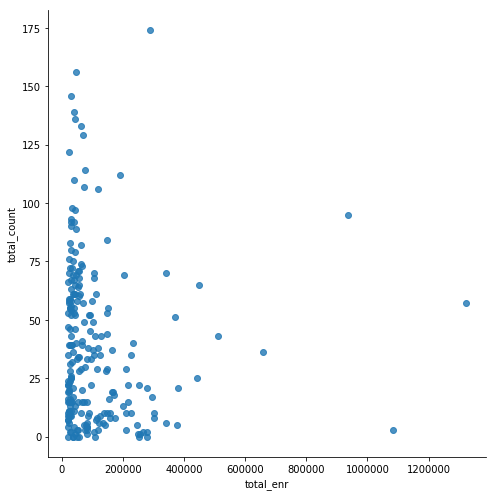

In [7]:

# Highlight Pinellas with facetgrid
g = sns.FacetGrid(data, size=7)

g.map(plt.scatter, "total_enr", "total_count", alpha=.8)

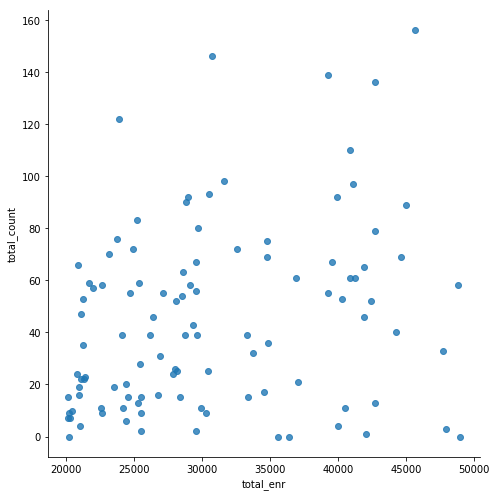

In [8]:
smaller_data = data[data.total_enr < 50000]

# Highlight Pinellas with facetgrid
g = sns.FacetGrid(smaller_data, size=7)

g.map(plt.scatter, "total_enr", "total_count", alpha=.8)

In [9]:
data[(data.total_enr >= 10000) & (data.total_count < 5)].sort_values('total_count')

,instname,total_enr,murder,manslaughter,forcible,nonforce,robbery,agg_aslt,burglary,vehicle,arson,total_count
220,Walden University,48982,0,0,0,0,0,0,0,0,0,0
77,Kaplan University-Davenport Campus,56606,0,0,0,0,0,0,0,0,0,0
47,Excelsior College,35608,0,0,0,0,0,0,0,0,0,0
122,Rio Salado College,251090,0,0,0,0,0,0,0,0,0,0
38,DeVry University-Illinois,279210,0,0,0,0,0,0,0,0,0,0
16,Capella University,36375,0,0,0,0,0,0,0,0,0,0
157,Thomas Edison State College,20251,0,0,0,0,0,0,0,0,0,0
143,Suffolk County Community College,107148,0,0,0,0,0,0,0,0,0,0
27,Columbus State Community College,247368,0,0,0,0,0,0,1,0,0,1
19,Central Texas College,80985,0,0,0,0,0,1,0,0,0,1


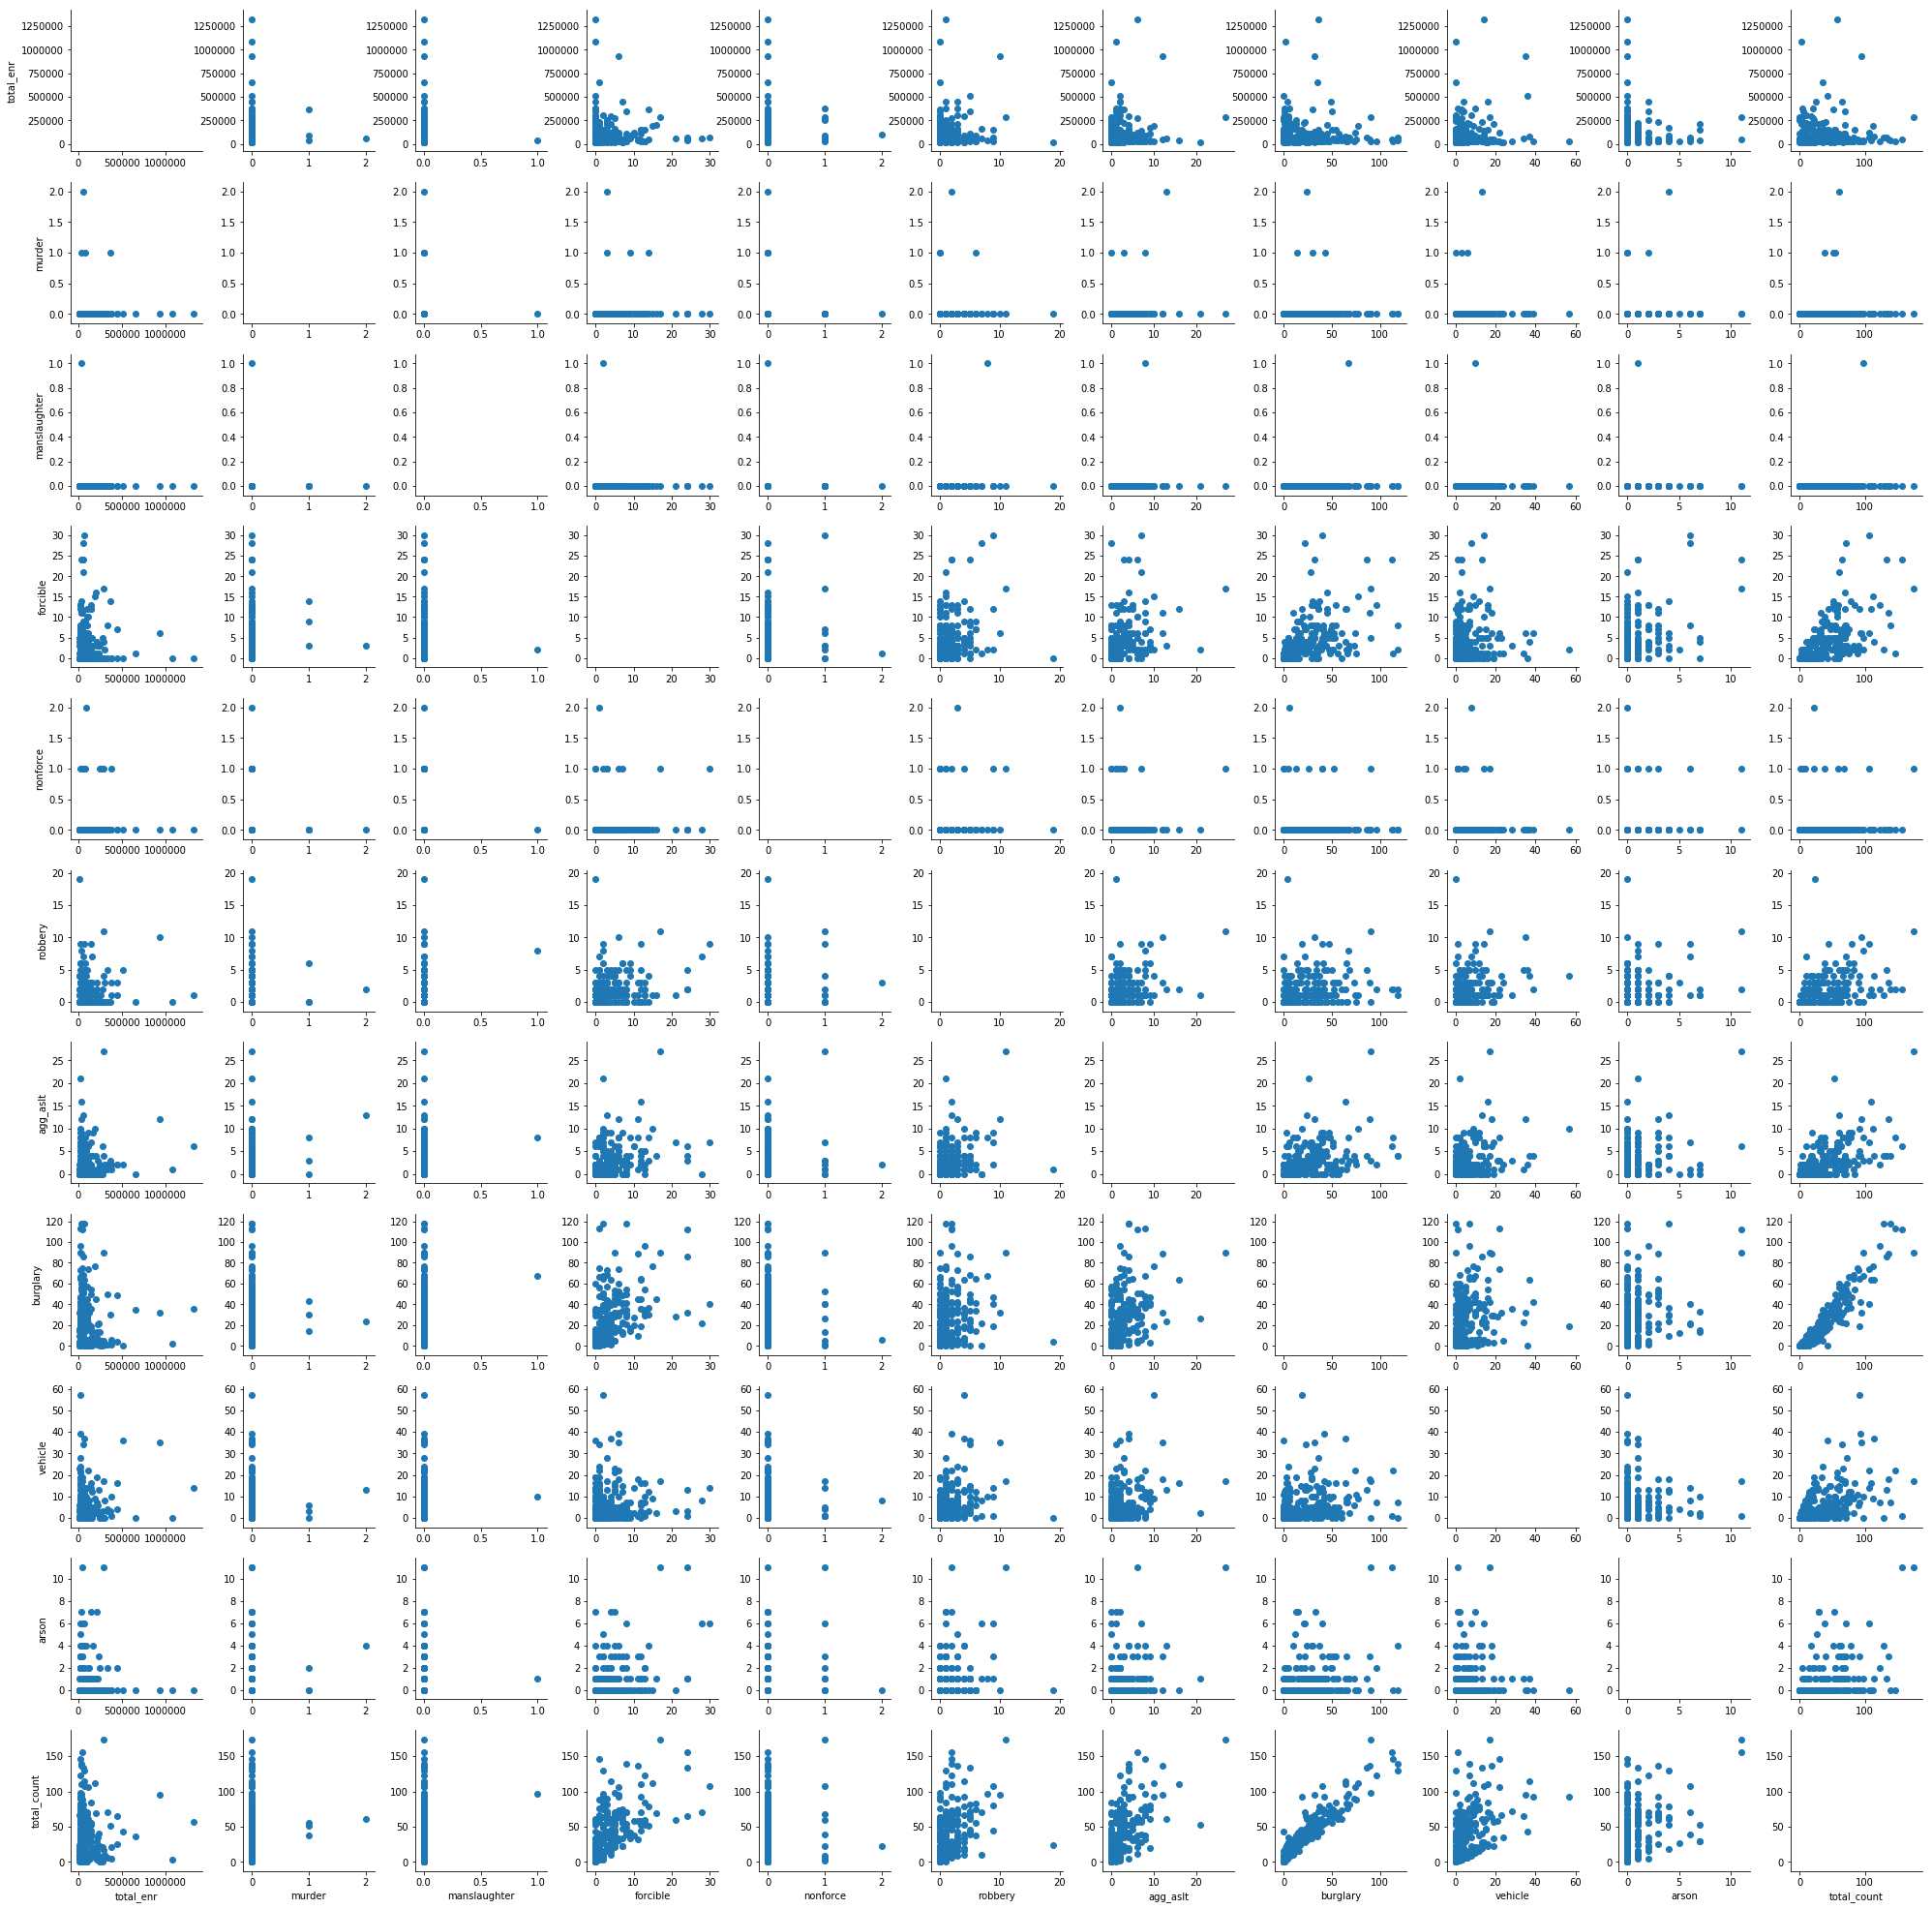

In [10]:
g = sns.PairGrid(data)
g.map_offdiag(plt.scatter);

In [14]:
data = pd.read_csv("/Users/lc_sherman/Desktop/advanced-data-journalism/assignments/analysis_assignment/campus_crime.csv")

data[:10]

,instname,total_enr,murder,manslaughter,forcible,nonforce,robbery,agg_aslt,burglary,vehicle,arson
0,American River College,95250,0,0,1,2,3,2,6,8,0
1,Arizona State University,289016,0,0,17,1,11,27,90,17,11
2,Ashford University,74596,0,0,2,0,0,0,1,0,0
3,Auburn University,25469,0,0,1,0,2,0,22,3,0
4,Austin Community College District,1082400,0,0,0,0,0,1,2,0,0
5,Ball State University,44294,0,0,8,0,1,0,31,0,0
6,Boston University,64878,0,0,6,0,2,3,60,2,0
7,Brigham Young University-Provo,170505,0,0,0,0,0,1,10,3,4
8,Broward College,379782,0,0,0,0,3,2,6,10,0
9,California State Polytechnic University-Pomona,21107,0,0,7,0,2,0,23,15,0


In [16]:
data["total_count"] = data["murder"] + data["manslaughter"] + data["forcible"]\
  + data["nonforce"] + data["robbery"] + data["agg_aslt"] + data["burglary"]\
  + data['vehicle'] + data["arson"]


data[:5]

,instname,total_enr,murder,manslaughter,forcible,nonforce,robbery,agg_aslt,burglary,vehicle,arson,total_count
0,American River College,95250,0,0,1,2,3,2,6,8,0,22
1,Arizona State University,289016,0,0,17,1,11,27,90,17,11,174
2,Ashford University,74596,0,0,2,0,0,0,1,0,0,3
3,Auburn University,25469,0,0,1,0,2,0,22,3,0,28
4,Austin Community College District,1082400,0,0,0,0,0,1,2,0,0,3


In [21]:
data[("total count") & "total_enr"]

TypeError: unsupported operand type(s) for &: 'str' and 'str'

In [23]:
data[:10]

,instname,total_enr,murder,manslaughter,forcible,nonforce,robbery,agg_aslt,burglary,vehicle,arson,total_count
0,American River College,95250,0,0,1,2,3,2,6,8,0,22
1,Arizona State University,289016,0,0,17,1,11,27,90,17,11,174
2,Ashford University,74596,0,0,2,0,0,0,1,0,0,3
3,Auburn University,25469,0,0,1,0,2,0,22,3,0,28
4,Austin Community College District,1082400,0,0,0,0,0,1,2,0,0,3
5,Ball State University,44294,0,0,8,0,1,0,31,0,0,40
6,Boston University,64878,0,0,6,0,2,3,60,2,0,73
7,Brigham Young University-Provo,170505,0,0,0,0,0,1,10,3,4,18
8,Broward College,379782,0,0,0,0,3,2,6,10,0,21
9,California State Polytechnic University-Pomona,21107,0,0,7,0,2,0,23,15,0,47


In [26]:
data['instname']

0                                 American River College
1                               Arizona State University
2                                     Ashford University
3                                      Auburn University
4                      Austin Community College District
5                                  Ball State University
6                                      Boston University
7                         Brigham Young University-Provo
8                                        Broward College
9         California State Polytechnic University-Pomona
10                    California State University-Fresno
11                 California State University-Fullerton
12                California State University-Long Beach
13               California State University-Los Angeles
14                California State University-Northridge
15                California State University-Sacramento
16                                    Capella University
17                           Ce

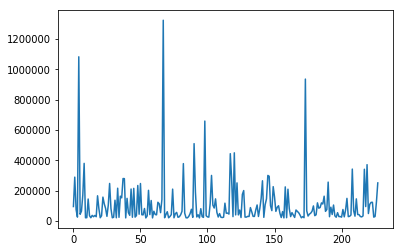

In [31]:
data['total_enr'].plot()

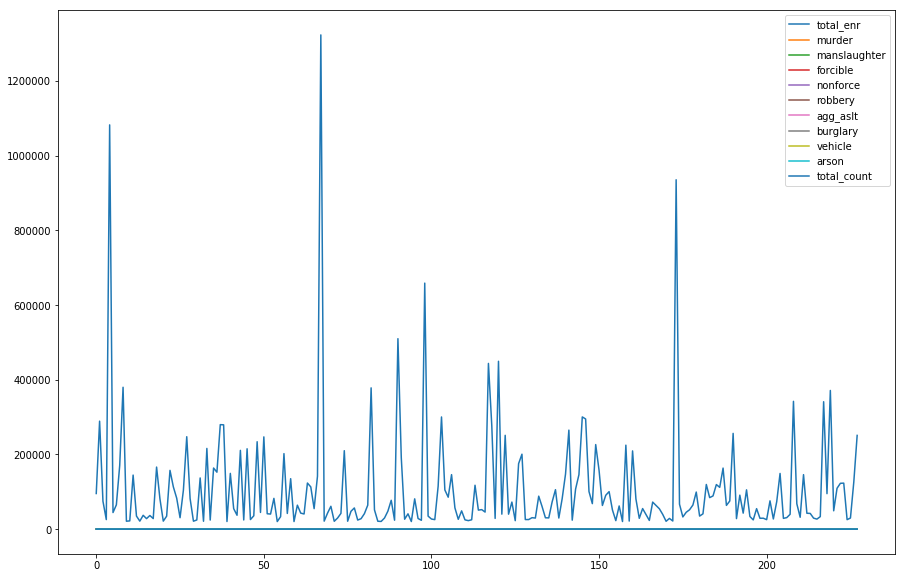

In [33]:
data.plot(figsize=(15,10))

In [34]:
data

,instname,total_enr,murder,manslaughter,forcible,nonforce,robbery,agg_aslt,burglary,vehicle,arson,total_count
0,American River College,95250,0,0,1,2,3,2,6,8,0,22
1,Arizona State University,289016,0,0,17,1,11,27,90,17,11,174
2,Ashford University,74596,0,0,2,0,0,0,1,0,0,3
3,Auburn University,25469,0,0,1,0,2,0,22,3,0,28
4,Austin Community College District,1082400,0,0,0,0,0,1,2,0,0,3
5,Ball State University,44294,0,0,8,0,1,0,31,0,0,40
6,Boston University,64878,0,0,6,0,2,3,60,2,0,73
7,Brigham Young University-Provo,170505,0,0,0,0,0,1,10,3,4,18
8,Broward College,379782,0,0,0,0,3,2,6,10,0,21
9,California State Polytechnic University-Pomona,21107,0,0,7,0,2,0,23,15,0,47


In [37]:
data[['total_enr', 'total_count']][:20]

,total_enr,total_count
0,95250,22
1,289016,174
2,74596,3
3,25469,28
4,1082400,3
5,44294,40
6,64878,73
7,170505,18
8,379782,21
9,21107,47


In [39]:
data[ 'total_enr'].value_counts()

24463     2
113151    1
105114    1
64096     1
39596     1
279210    1
265024    1
117416    1
50854     1
119460    1
94881     1
163488    1
23199     1
75262     1
378174    1
29617     1
28977     1
82272     1
48780     1
21131     1
26757     1
61060     1
41087     1
22654     1
279675    1
246904    1
21107     1
166062    1
24753     1
24175     1
         ..
30467     1
72318     1
163356    1
75636     1
104795    1
28016     1
64878     1
51564     1
99178     1
39271     1
29541     1
74596     1
202080    1
111756    1
51112     1
26201     1
21335     1
41280     1
20310     1
300372    1
210771    1
28849     1
112975    1
40270     1
141645    1
26442     1
200520    1
152388    1
47938     1
34816     1
Name: total_enr, Length: 227, dtype: int64

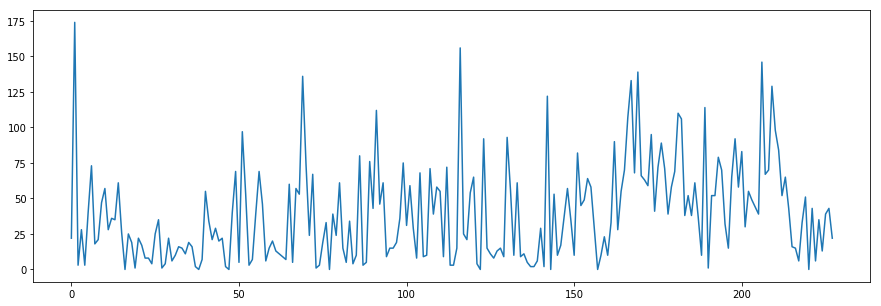

In [41]:
data['total_count'].plot(figsize=(15,5))

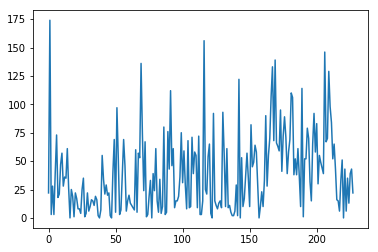

In [43]:
data['total_enr']
data['total_count'].plot()

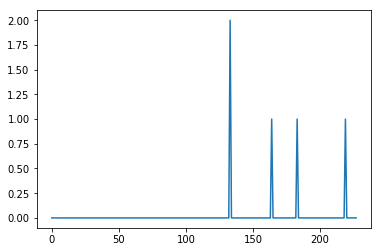

In [46]:
data['total_enr']
data['murder'].plot()

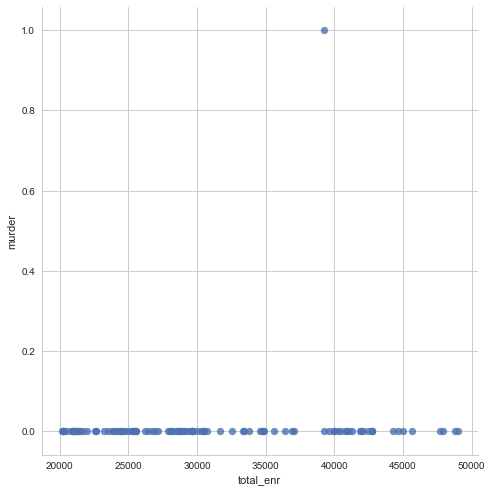

In [59]:
g = sns.FacetGrid(smaller_data, size=7)

g.map(plt.scatter, "total_enr", "murder", alpha=.8)

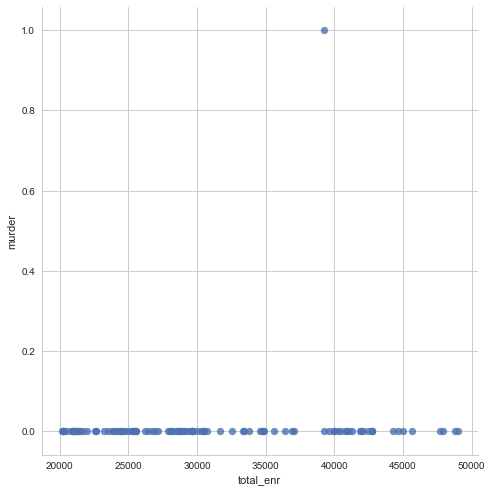

In [60]:
smaller_data = data[data.total_enr < 50000]

# Highlight Pinellas with facetgrid
g = sns.FacetGrid(smaller_data, size=7)

g.map(plt.scatter, "total_enr", "murder", alpha=.8)

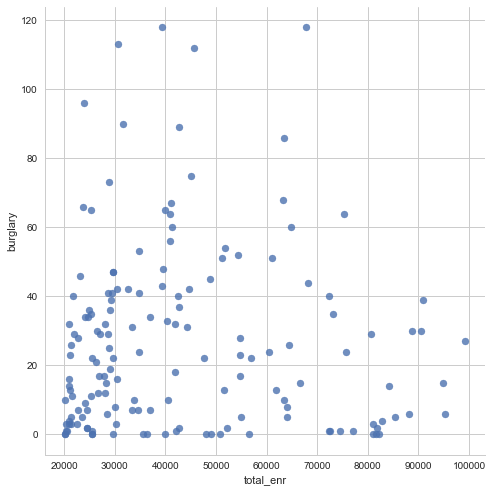

In [63]:
g = sns.FacetGrid(smaller_data, size=7)

g.map(plt.scatter, "total_enr", "burglary", alpha=.8)

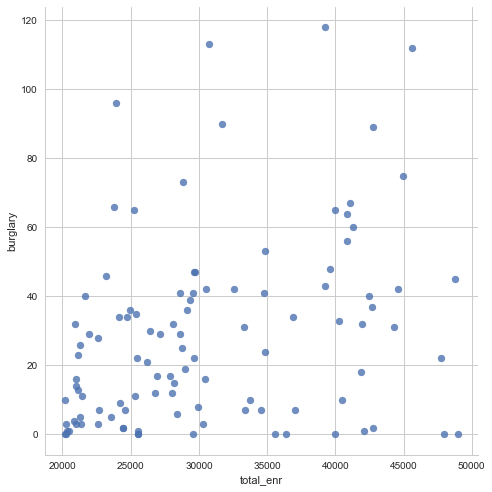

In [64]:
smaller_data = data[data.total_enr < 50000]

# Highlight Pinellas with facetgrid
g = sns.FacetGrid(smaller_data, size=7)

g.map(plt.scatter, "total_enr", "burglary", alpha=.8)

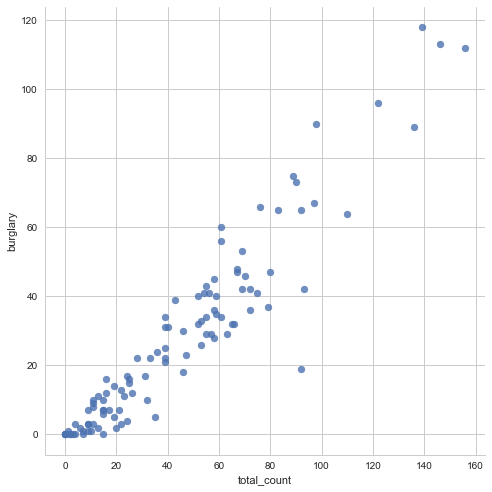

In [65]:
g = sns.FacetGrid(smaller_data, size=7)

g.map(plt.scatter, "total_count", "burglary", alpha=.8)

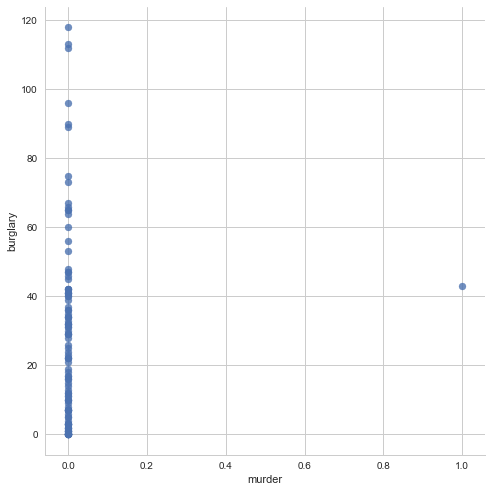

In [66]:
g = sns.FacetGrid(smaller_data, size=7)

g.map(plt.scatter, "murder", "burglary", alpha=.8)

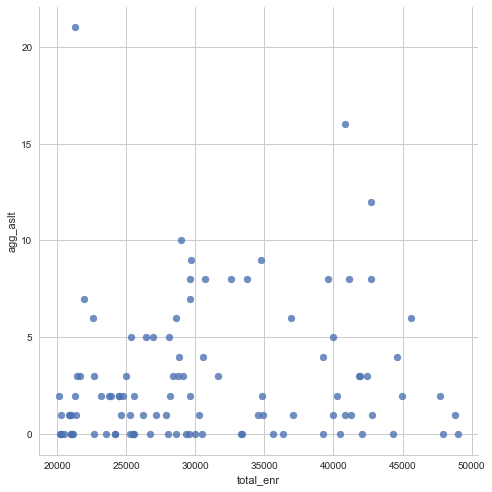

In [68]:
g = sns.FacetGrid(smaller_data, size=7)

g.map(plt.scatter, "total_enr", "agg_aslt", alpha=.8)

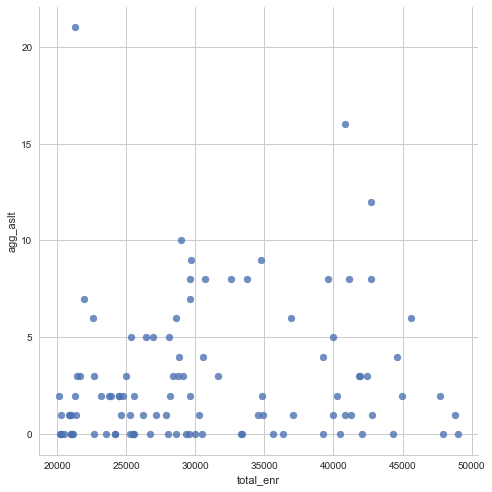

In [70]:
smaller_data = data[data.total_enr < 50000]

g = sns.FacetGrid(smaller_data, size=7)

g.map(plt.scatter, "total_enr", "agg_aslt", alpha=.8)

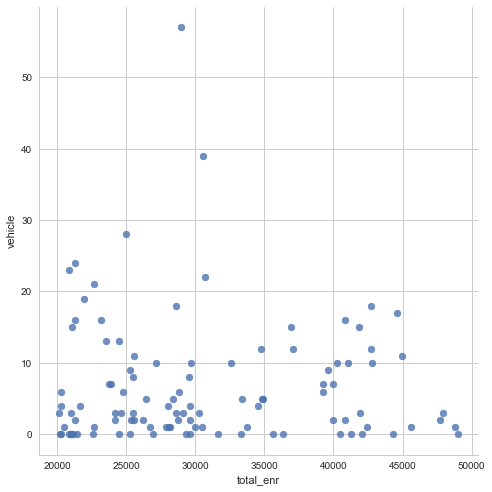

In [71]:
g = sns.FacetGrid(smaller_data, size=7)

g.map(plt.scatter, "total_enr", "vehicle", alpha=.8)

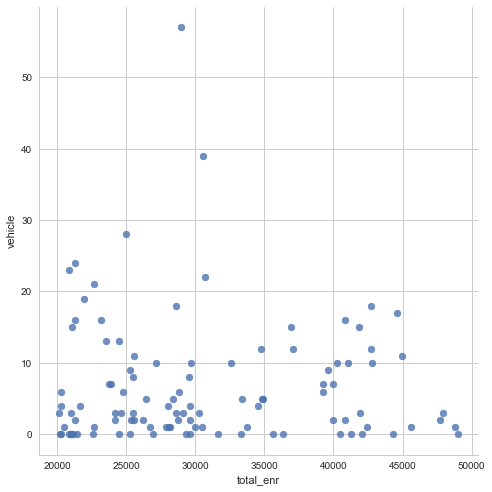

In [72]:
smaller_data = data[data.total_enr < 50000]

g = sns.FacetGrid(smaller_data, size=7)

g.map(plt.scatter, "total_enr", "vehicle", alpha=.8)

In [75]:
from pandas.core import datetools

In [76]:
from ggplot import *
data.head()

,instname,total_enr,murder,manslaughter,forcible,nonforce,robbery,agg_aslt,burglary,vehicle,arson,total_count
0,American River College,95250,0,0,1,2,3,2,6,8,0,22
1,Arizona State University,289016,0,0,17,1,11,27,90,17,11,174
2,Ashford University,74596,0,0,2,0,0,0,1,0,0,3
3,Auburn University,25469,0,0,1,0,2,0,22,3,0,28
4,Austin Community College District,1082400,0,0,0,0,0,1,2,0,0,3


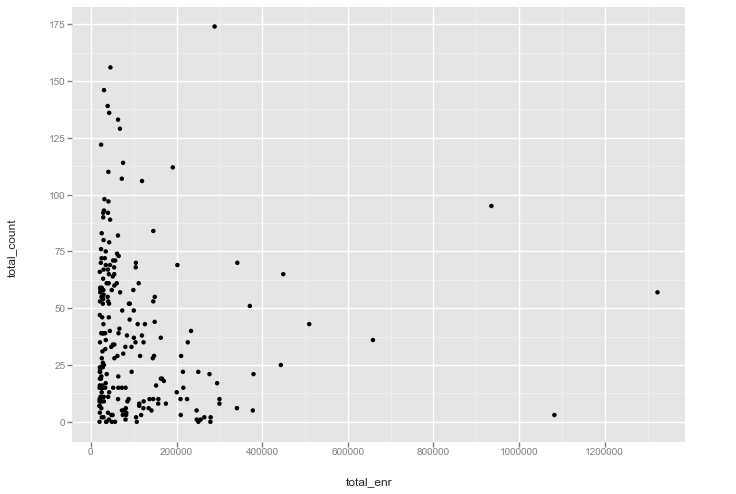

<ggplot: (288050261)>

In [82]:
p = ggplot(aes(x='total_enr', y='total_count'), data=data)
p + geom_point() 

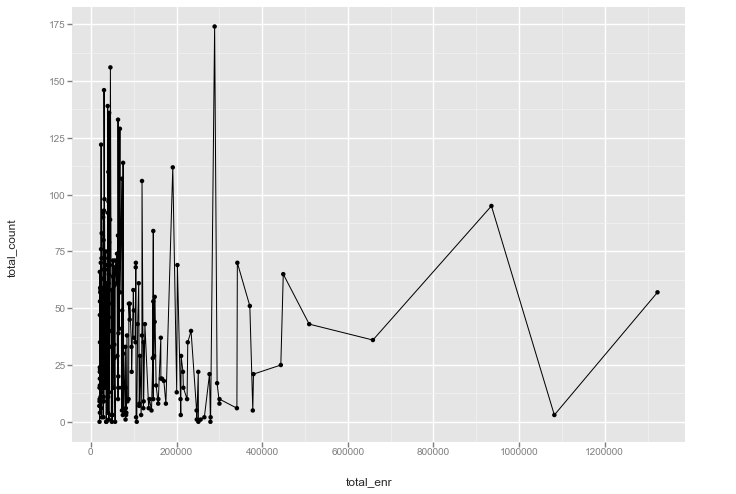

<ggplot: (288051505)>

In [83]:
p = ggplot(aes(x='total_enr', y='total_count'), data=data)
p + geom_point() + geom_line()

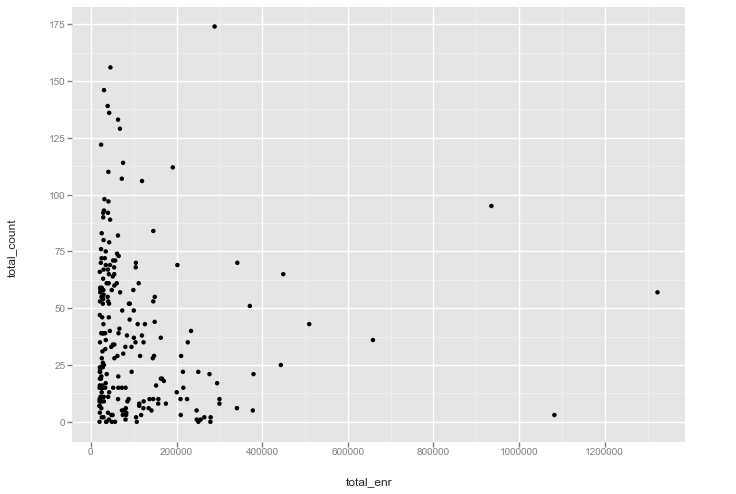

<ggplot: (284858269)>

In [90]:
ggplot(data,aes(x='total_enr',y='total_count')) + \
    geom_point() 
   